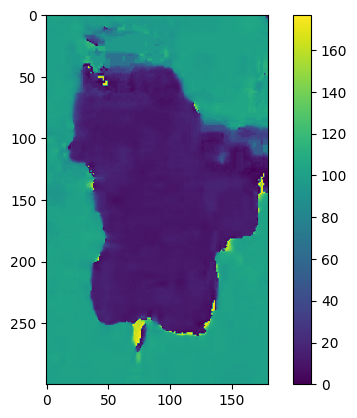

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Đọc hình ảnh
image = cv2.imread("P268-2r.jpg")

# Chuyển đổi sang không gian màu HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Trích xuất kênh màu H (hue)
h_channel = hsv_image[:, :, 0]

# Hiển thị kênh màu H
plt.imshow(h_channel)
plt.colorbar()
plt.show()

In [3]:
h_channel = hsv_image[:, :, 0]

# Bước 3: Áp dụng ngưỡng (thresholding) để phân ngưỡng kênh màu H và tạo hình ảnh nhị phân
_, threshold = cv2.threshold(h_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Bước 4: Loại bỏ nhiễu và các vùng không mong muốn bằng phép biến đổi hình thái học
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 6))
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations=3)


In [ ]:
def process_image(image_file): 
    image = cv2.imread(image_file)
    mask_path = file_path.replace("image", "mask").replace(".jpg", ".png")
    mask = cv2.imread(mask_path)
    increased_contrast = increase_contrast(image, 1.5, 0)
    hsv_image = cv2.cvtColor(increased_contrast, cv2.COLOR_BGR2HSV)
    h_channel = hsv_image[:, :, 0]

    # Xác định vùng màu H cần lọc
    lower_hue = 0    # Ngưỡng dưới cho màu H
    upper_hue = 30   # Ngưỡng trên cho màu H
    hue_mask = cv2.inRange(h_channel, lower_hue, upper_hue)

    # Áp dụng mask lên ảnh gốc
    image = cv2.bitwise_and(image, image, mask=hue_mask)
    plt.imshow(image)
    # X = image.reshape(-10,4)
    # kmeans = KMeans(n_clusters=20, n_init=10)
    # kmeans.fit(X)
    # image.shape
    x,y,z = image.shape
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image.reshape(-1,3)
    # kmeans = KMeans(n_clusters=20, n_init=10)
    # kmeans.fit(X)
    dominant_color = 15
    model = KMeans(dominant_color, n_init=10)
    model.fit(image)
    colors = model.cluster_centers_
    colors = np.array(colors, dtype= "uint8")
    colors
    new_image= np.zeros((x*y,z), dtype="uint8")
    for i in range(new_image.shape[0]):
        new_image[i] = colors[model.labels_[i]]
    new_image = np.reshape(new_image,(x,y,z))
    hsv_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2HSV)

    # Phân ngưỡng dựa trên kênh màu S (saturation)
    threshold_value = 155
    _, threshold = cv2.threshold(hsv_image[:, :, 2], threshold_value, 250, cv2.THRESH_BINARY)

    # Xử lý mờ (optional)
    #threshold = cv2.GaussianBlur(threshold, (5, 5), 0)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))
    # Thực hiện phép toán đóng
    closing = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    # Thực hiện phép toán mở
    opened_image = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

    # Thực hiện phép giãn nở
    dilated_image = cv2.dilate(opened_image, kernel, iterations=1)

    # Áp dụng mask lên ảnh gốc để tách phần nền
    background = cv2.bitwise_and(new_image,new_image, mask=dilated_image)

    background_mask = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)

    # Tìm các contour trên mask
    contours, _ = cv2.findContours(background_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Lọc các contour theo diện tích
    min_area =300
    filtered_contours = [cnt for cnt in contours if (min_area <cv2.contourArea(cnt))]

    # Tạo ảnh đen với kích thước của mask
    background_result = np.zeros_like(background_mask)
    
    # Vẽ các contour lên ảnh đen
    cv2.drawContours(background_result, filtered_contours, -1, (255), thickness=cv2.FILLED)
    result_image = cv2.bitwise_and(background, background, mask=background_result)
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    evaluation_data = evaluation(mask_gray, )
    file_name = os.path.basename(image_file)
    output_file_path = os.path.join(output_folder_path, file_name)
    final_image = Image.fromarray(background)
    return final_image

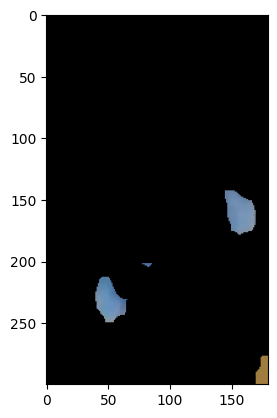

In [40]:

# # Bước 5: Tìm các contours của vùng quan tâm (ong) trong hình ảnh đã được xử lý
# contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Bước 6: Tạo mask và vẽ contours lên mask
# mask = np.zeros_like(image)
# cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# # Bước 7: Áp dụng mask lên hình ảnh gốc để loại bỏ nền và chỉ giữ lại phần con ong
# result = cv2.bitwise_and(image, mask)

# # Hiển thị hình ảnh gốc, hình ảnh nhị phân, và kết quả
# plt.imshow(image)
# plt.imshow( opening)
# # plt.imshow(result)

# Chuyển đổi sang không gian màu HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Phân ngưỡng dựa trên kênh màu S (saturation)
threshold_value =158
_, threshold = cv2.threshold(hsv_image[:, :, 2], threshold_value, 255, cv2.THRESH_BINARY)

# Xử lý mờ (optional)
#threshold = cv2.GaussianBlur(threshold, (5, 5), 0)

# Áp dụng phép toán hình học (loại bỏ các lỗ hổng nhỏ)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
threshold = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)


# Áp dụng mask lên ảnh gốc để tách phần nền
background = cv2.bitwise_and(image, image, mask=threshold)
plt.imshow(background)